## 第二章 数据分析

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
testA = pd.read_csv('testA.csv')

In [4]:
train.shape

(800000, 47)

In [9]:
testA.shape

(200000, 46)

In [10]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


### 分类指标评价计算实例

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = [0,1,0,1,0,0]
y_true = [0,1,1,0,1,1]
print('混淆矩阵：\n',confusion_matrix(y_pred,y_true))

混淆矩阵：
 [[1 3]
 [1 1]]


In [12]:
## accuracy  准确率 
from sklearn.metrics import accuracy_score
y_pred = [0,1,0,1]
y_true = [0,1,1,0]
print('ACC',accuracy_score(y_true,y_pred))

ACC 0.5


In [13]:
## Precision,Recall,F1-score
from sklearn import metrics
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 0]
print('Precision',metrics.precision_score(y_true, y_pred)) 
print('Recall',metrics.recall_score(y_true, y_pred)) 
print('F1-score:',metrics.f1_score(y_true, y_pred))

Precision 0.5
Recall 0.5
F1-score: 0.5


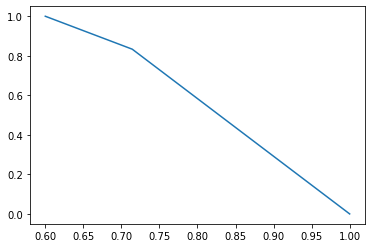

In [16]:
## P-R曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
plt.plot(precision, recall)

Text(0.5, 0, 'FPR')

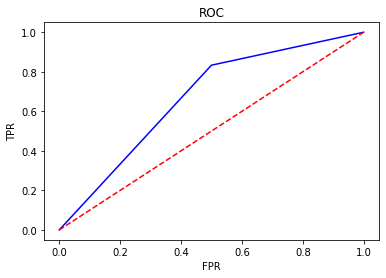

In [17]:
## ROC曲线 x轴为 FPR （假正例率） y轴为TPR（真正例率）
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1] 
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1] 
FPR,TPR,thresholds=roc_curve(y_true, y_pred) 
plt.title('ROC')
plt.plot(FPR, TPR,'b') 
plt.plot([0,1],[0,1],'r--') 
plt.ylabel('TPR')
plt.xlabel('FPR')

In [22]:
# AUC  roc曲线下与坐标轴围成的面积 
#显然这个面积的数值不会大于1。
#又由于 ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在0.5和1之间。
#AUC越接近1.0，检测方法真实性越 高;等于0.5时，则真实性最低，无应用价值
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


In [23]:
# KS值，在实际操作时往往使用ROC曲线配合求出KS值
from sklearn.metrics import roc_curve
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1]
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 1, 1] 
FPR,TPR,thresholds=roc_curve(y_true, y_pred) 
KS=abs(FPR-TPR).max()
print('KS值:',KS)

KS值: 0.5238095238095237


### 2.1 学习目标

### 2.2 内容介绍

### 2.3 代码示例
#### 2.3.1 导入数据分析及可视化过程需要的库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('train.csv')
data_test_a = pd.read_csv('testA.csv')

读取文件的部分（适用于文件特别大的场景）
  通过nrows参数，来设置读取文件的前多少行，nrows是一个大于等于0的整数，pd.read_csv('train.csv',nrows = 5)；
  分块读取chunksize,可控制每次迭代数据的大小

### 2.3.3总体了解
#### 查看数据集的样本个数和原始特维度

In [5]:
data_test_a.shape

(200000, 46)

In [6]:
data_train.shape

(800000, 47)

In [7]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

##### 通过 info( ) 来熟悉数据类型

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

##### 总体粗略的查看数据集各个特征的一些基本统计量

In [10]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [11]:
data_train.head(3).append(data_train.tail(3))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


#### 2.3.4 查看数据集中特征缺失值，唯一值等

In [14]:
# 缺失值
data_train.isnull()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
799998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
data_train.isnull().any()

id                    False
loanAmnt              False
term                  False
interestRate          False
installment           False
grade                 False
subGrade              False
employmentTitle        True
employmentLength       True
homeOwnership         False
annualIncome          False
verificationStatus    False
issueDate             False
isDefault             False
purpose               False
postCode               True
regionCode            False
dti                    True
delinquency_2years    False
ficoRangeLow          False
ficoRangeHigh         False
openAcc               False
pubRec                False
pubRecBankruptcies     True
revolBal              False
revolUtil              True
totalAcc              False
initialListStatus     False
applicationType       False
earliesCreditLine     False
title                  True
policyCode            False
n0                     True
n1                     True
n2                     True
n3                  

In [16]:
data_train.isnull().any().sum()

22

In [17]:
data_train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [18]:
data_train.isnull().sum()/len(data_train)

id                    0.000000
loanAmnt              0.000000
term                  0.000000
interestRate          0.000000
installment           0.000000
grade                 0.000000
subGrade              0.000000
employmentTitle       0.000001
employmentLength      0.058499
homeOwnership         0.000000
annualIncome          0.000000
verificationStatus    0.000000
issueDate             0.000000
isDefault             0.000000
purpose               0.000000
postCode              0.000001
regionCode            0.000000
dti                   0.000299
delinquency_2years    0.000000
ficoRangeLow          0.000000
ficoRangeHigh         0.000000
openAcc               0.000000
pubRec                0.000000
pubRecBankruptcies    0.000506
revolBal              0.000000
revolUtil             0.000664
totalAcc              0.000000
initialListStatus     0.000000
applicationType       0.000000
earliesCreditLine     0.000000
title                 0.000001
policyCode            0.000000
n0      

In [21]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_morethanhalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_morethanhalf[key] = value        

In [22]:
fea_null_morethanhalf

{}

#### 具体的查看缺失特征及缺失率：

In [24]:
# nan可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0] # 存在缺失值的
missing

employmentTitle       0.000001
employmentLength      0.058499
postCode              0.000001
dti                   0.000299
pubRecBankruptcies    0.000506
revolUtil             0.000664
title                 0.000001
n0                    0.050338
n1                    0.050338
n2                    0.050338
n3                    0.050338
n4                    0.041549
n5                    0.050338
n6                    0.050338
n7                    0.050338
n8                    0.050339
n9                    0.050338
n10                   0.041549
n11                   0.087190
n12                   0.050338
n13                   0.050338
n14                   0.050338
dtype: float64

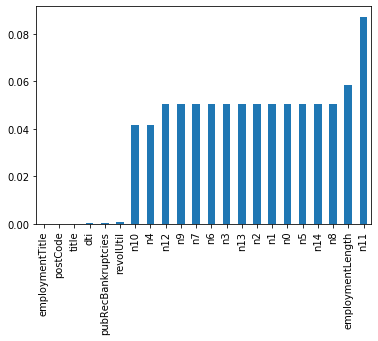

In [25]:
missing.sort_values(inplace=True)
missing.plot.bar()

#### 查看训练集测试集中特征属性只有一值的特征

In [ ]:
one_value_fea = 